In [1]:
# Importing necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder


In [3]:
sms_data = pd.read_csv("/Users/apple/Desktop/CodSoft Intership Projects /Spam Sms Detection  /spam.csv",  encoding='latin-1', engine='python', usecols=['v1', 'v2'])

In [4]:
print(sms_data.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
# Basic information about the dataset
print(sms_data.shape)
print(sms_data.size)
print(sms_data.info())
print(sms_data.describe())

(5572, 2)
11144
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
          v1                      v2
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [6]:
# Checking for missing values and duplicates
print(sms_data.isnull().values.any())
print(sms_data.isnull().sum())
print(sms_data.duplicated().values.any())
print(sms_data.duplicated().sum())

False
v1    0
v2    0
dtype: int64
True
403


In [7]:

# Removing duplicate entries
sms_data.drop_duplicates(inplace=True)

In [8]:

# Displaying updated dataset statistics
print(sms_data.describe())

          v1                                                 v2
count   5169                                               5169
unique     2                                               5169
top      ham  Go until jurong point, crazy.. Available only ...
freq    4516                                                  1


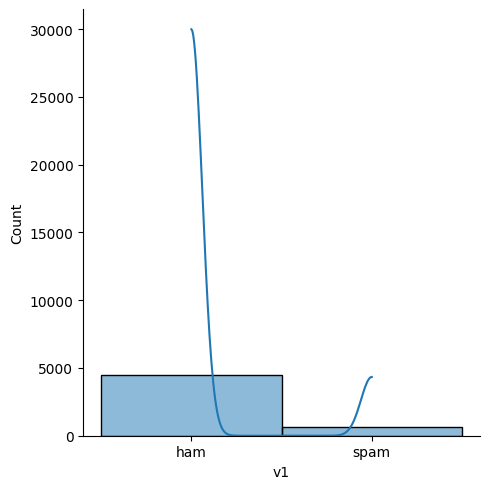

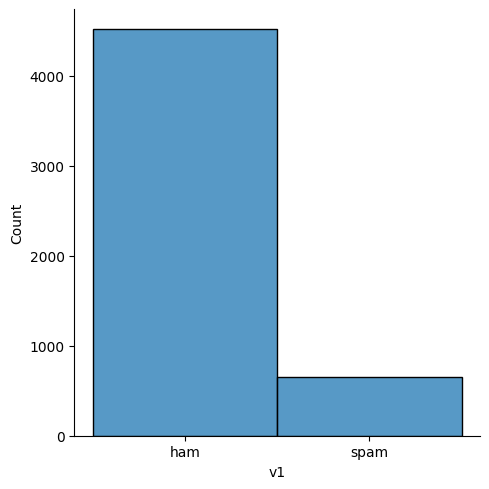

In [9]:
# Plotting the distribution of the labels
sns.displot(sms_data['v1'], kde=True)
sns.displot(sms_data['v1'])


In [10]:
# Encoding the labels
label_encoder = LabelEncoder()
sms_data["encoded_label"] = label_encoder.fit_transform(sms_data["v1"].values)


In [11]:
# Vectorizing the messages
tfidf_vectorizer = TfidfVectorizer()
features = tfidf_vectorizer.fit_transform(sms_data["v2"])


In [12]:
# Converting the features to an array and displaying their shapes
print(features.toarray())
print(features.shape)
print(sms_data["encoded_label"].shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5169, 8672)
(5169,)


In [13]:
# Counting the number of 'ham' and 'spam' messages
ham_messages = len(sms_data[sms_data["encoded_label"] == 0])
spam_messages = len(sms_data[sms_data["encoded_label"] == 1])
message_labels = np.array(["Ham", "Spam"])
message_counts = np.array([ham_messages, spam_messages])

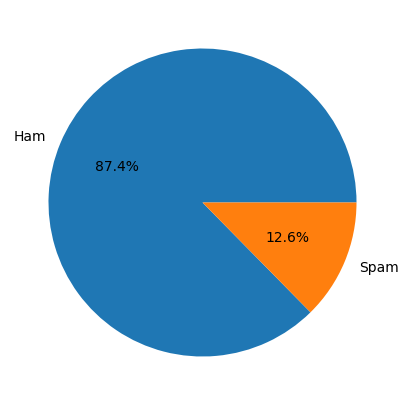

In [14]:
# Plotting the distribution of 'ham' and 'spam' messages
plt.figure(figsize=(5, 5))
plt.pie(message_counts, labels=message_labels, autopct="%.1f%%")
plt.show()

In [15]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, sms_data["encoded_label"], 
                                                    test_size=0.2, random_state=42)


In [16]:
# Initializing and training the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

In [17]:
# Initializing and training the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

In [18]:
# Initializing and training the Support Vector Machine model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)


In [19]:
# Evaluating the models
print("Naive Bayes Accuracy: ", accuracy_score(y_test, nb_predictions))
print("Logistic Regression Accuracy: ", accuracy_score(y_test, logreg_predictions))
print("SVM Accuracy: ", accuracy_score(y_test, svm_predictions))

# Printing classification reports for each model
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, logreg_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

# Printing confusion matrices for each model
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, logreg_predictions))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))

Naive Bayes Accuracy:  0.9555125725338491
Logistic Regression Accuracy:  0.9555125725338491
SVM Accuracy:  0.9835589941972921
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.97      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
   